In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Improve:
* In legend $SSH$$_{model}$ instead?

Mat: en gros plus ta pente est flat plus t'es turbulent

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset

import matplotlib.colors as colors
import matplotlib.cm as cmx
from itertools import product

import time
from datetime import datetime

import scipy.io as sio

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
directory = '/Users/laura/Documents/scripts/IMEDEA/paperASR/spectra/'

# Load selected box
mbox1 = sio.loadmat(directory + 'filter_box1_error.mat')

wf1_2m_box1 = mbox1['wf1_2m'].squeeze()
wf1_2o_box1 = mbox1['wf1_2o'].squeeze()

Pf_HRm_m_box1 = mbox1['Pf_HRm_m'].squeeze()
ebm_box1 = mbox1['ebm'].squeeze()
Pf_HRm_Mf1_m_box1 = mbox1['Pf_HRm_Mf1_m'].squeeze()
ebmf1_box1 = mbox1['ebmf1'].squeeze()
Pf_HRm_Mf2_m_box1 = mbox1['Pf_HRm_Mf2_m'].squeeze()
ebmf2_box1 = mbox1['ebmf2'].squeeze()
Pf_HRm_Mf4_m_box1 = mbox1['Pf_HRm_Mf4_m'].squeeze()
ebmf4_box1 = mbox1['ebmf4'].squeeze()

Pf_HRo_m_box1 = mbox1['Pf_HRo_m'].squeeze()
Pf_HRo_Mf1_m_box1 = mbox1['Pf_HRo_Mf1_m'].squeeze()
ebof1_box1 = mbox1['ebof1'].squeeze()
ebo_box1 = mbox1['ebo'].squeeze()
Pf_HRo_Mf2_m_box1 = mbox1['Pf_HRo_Mf2_m'].squeeze()
ebof2_box1 = mbox1['ebof2'].squeeze()
Pf_HRo_Mf4_m_box1 = mbox1['Pf_HRo_Mf4_m'].squeeze()
ebof4_box1 = mbox1['ebof4'].squeeze()

mbox2 = sio.loadmat(directory + 'filter_box2_error.mat')

wf1_2m_box2 = mbox2['wf1_2m'].squeeze()
wf1_2o_box2 = mbox2['wf1_2o'].squeeze()

Pf_HRm_m_box2 = mbox2['Pf_HRm_m'].squeeze()
ebm_box2 = mbox2['ebm'].squeeze()
Pf_HRm_Mf1_m_box2 = mbox2['Pf_HRm_Mf1_m'].squeeze()
ebmf1_box2 = mbox2['ebmf1'].squeeze()
Pf_HRm_Mf2_m_box2 = mbox2['Pf_HRm_Mf2_m'].squeeze()
ebmf2_box2 = mbox2['ebmf2'].squeeze()
Pf_HRm_Mf4_m_box2 = mbox2['Pf_HRm_Mf4_m'].squeeze()
ebmf4_box2 = mbox2['ebmf4'].squeeze()

Pf_HRo_m_box2 = mbox2['Pf_HRo_m'].squeeze()
ebo_box2 = mbox2['ebo'].squeeze()
Pf_HRo_Mf1_m_box2 = mbox2['Pf_HRo_Mf1_m'].squeeze()
ebof1_box2 = mbox2['ebof1'].squeeze()
Pf_HRo_Mf2_m_box2 = mbox2['Pf_HRo_Mf2_m'].squeeze()
ebof2_box2 = mbox2['ebof2'].squeeze()
Pf_HRo_Mf4_m_box2 = mbox2['Pf_HRo_Mf4_m'].squeeze()
ebof4_box2 = mbox2['ebof4'].squeeze()


/Users/laura/anaconda2/lib/python2.7/site-packages/scipy/io/matlab/mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


# Pass 15:

In [5]:
plt.rc('legend',**{'fontsize':10})

/Users/laura/anaconda2/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


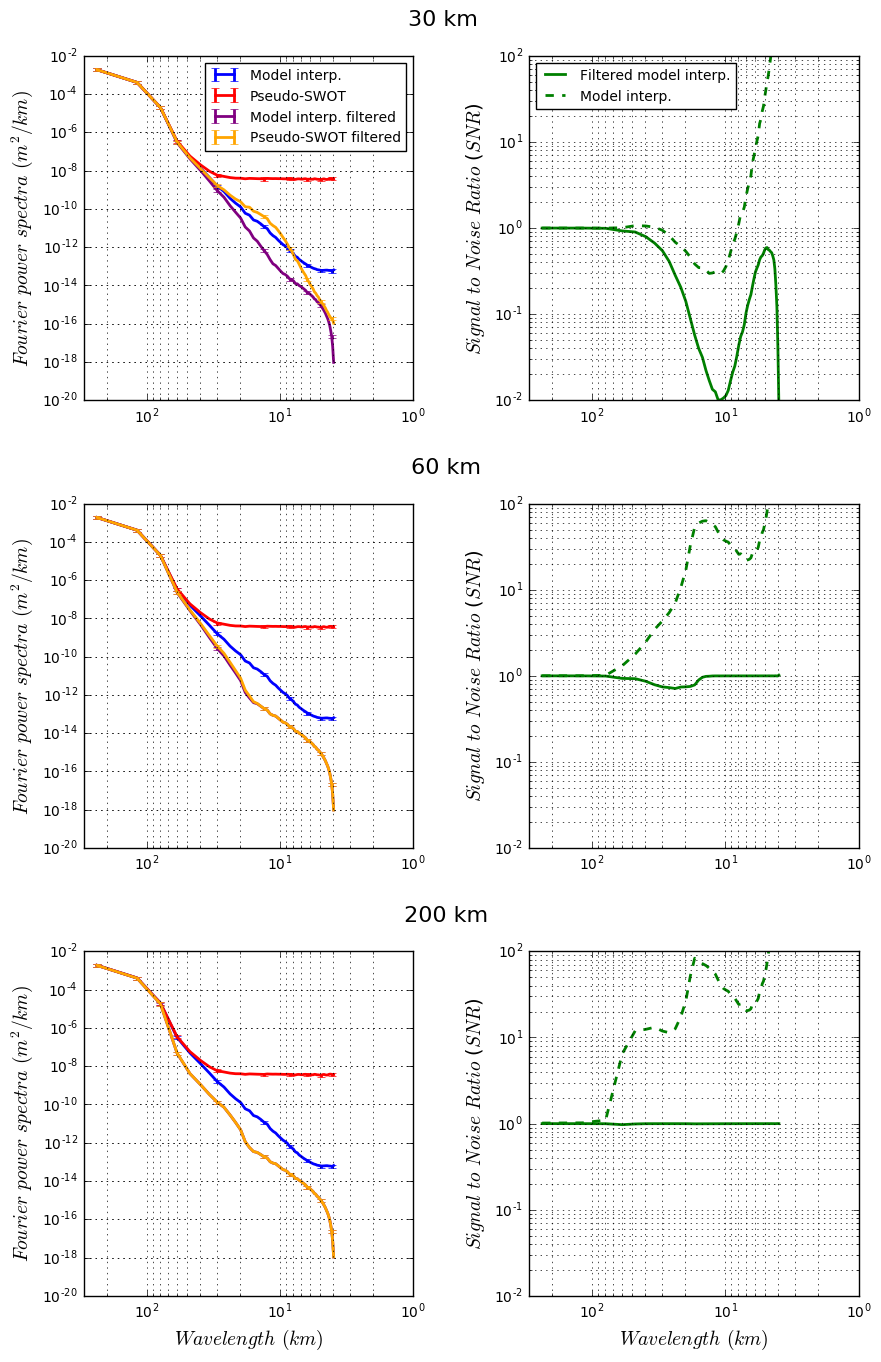

In [6]:
plt.figure(figsize=(10, 16))

gs = gridspec.GridSpec(3, 2)

ax = plt.subplot(gs[0,0])
plt.axis([300.,1.,1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box1, Pf_HRm_Mf1_m_box1, yerr=ebmf1_box1.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_Mf1_m_box1, yerr=ebof1_box1.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('30 km \n', x=1.1, size='16')
ax.legend(('Model interp.', 'Pseudo-SWOT', 'Model interp. filtered', 'Pseudo-SWOT filtered'), loc='upper right')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[1,0])
plt.axis([300.,1.,1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box1, Pf_HRm_Mf2_m_box1, yerr=ebmf2_box1.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_Mf2_m_box1, yerr=ebof2_box1.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 60 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[2,0])
plt.axis([300.,1.,1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box1, Pf_HRm_Mf4_m_box1, yerr=ebmf4_box1.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_Mf4_m_box1, yerr=ebof4_box1.T, color='orange', linewidth='2') #purple
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 200 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

# SNR

ax = plt.subplot(gs[0,1])
plt.axis([300., 1., 10e-3, 100.]) #1.015
plt.loglog(wf1_2o_box1, Pf_HRm_Mf1_m_box1/Pf_HRo_Mf1_m_box1, color='g', linewidth='2')
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf1_m_box1, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.legend(('Filtered model interp.', 'Model interp.'), loc='upper left')

ax = plt.subplot(gs[1,1])
plt.axis([300., 1., 10e-3, 100.]) #1.015
plt.loglog(wf1_2o_box1, Pf_HRm_Mf2_m_box1/Pf_HRo_Mf2_m_box1, color='g', linewidth='2')
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf2_m_box1, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')

ax = plt.subplot(gs[2,1])
plt.axis([300., 1., 10e-3, 100.]) #1.015
plt.loglog(wf1_2o_box1, Pf_HRm_Mf4_m_box1/Pf_HRo_Mf4_m_box1, color='g', linewidth='2')
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf4_m_box1, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')


"""
# zoom
#x1, x2, y1, y2 = 300., 1., .985, 1.005 # specify the limits
axins = inset_axes(ax, 2.5,1.3 , loc=2, bbox_to_anchor=(0.6, .23), bbox_transform=ax.figure.transFigure) # no zoom
axins.semilogx(wf1_2o_box1, Pf_HRm_Mf4_m_box1/Pf_HRo_Mf4_m_box1, 'g-', markersize=10, linewidth='2')
axins.semilogx(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf4_m_box1, 'g--', markersize=10, linewidth='2')
#x1, x2, y1, y2 = 130, 20, .95, 1.02 # specify the limits
x1, x2, y1, y2 = 300., 1., .96, 1.01 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
#plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
grid(b=True, which='minor')
grid(b=True, which='major')
"""

gs.update(hspace=0.3, wspace=0.35) 

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'spectra_p015' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/reduced/' + 'spectra_p015_LOWres' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=100)


# Pass 168:

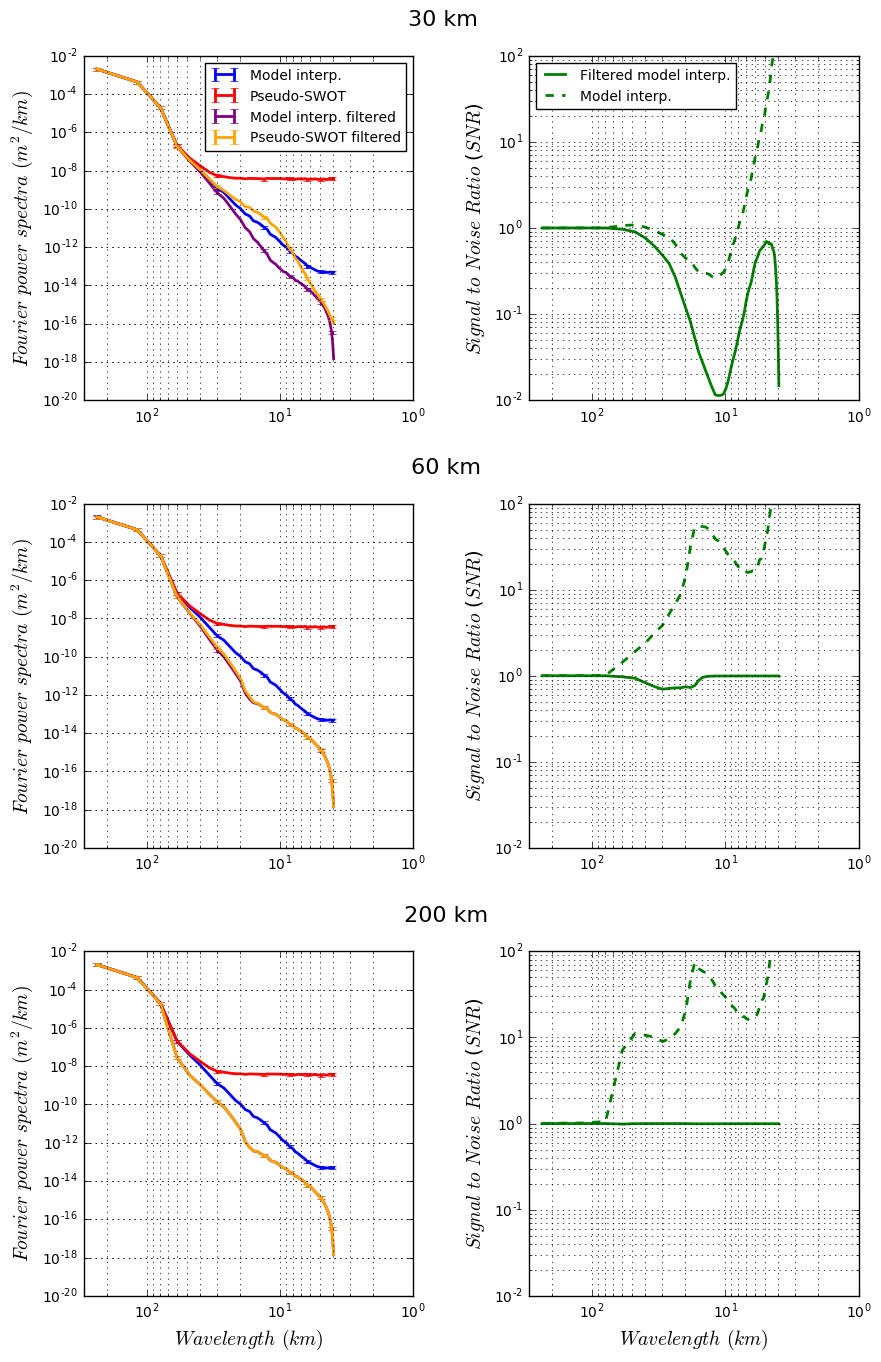

In [7]:
plt.figure(figsize=(10, 16))

gs = gridspec.GridSpec(3, 2)

ax = plt.subplot(gs[0,0])
plt.axis([300.,1.,1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box2, Pf_HRm_Mf1_m_box2, yerr=ebmf1_box2.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_Mf1_m_box2, yerr=ebof1_box2.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('30 km \n', x=1.1, size='16')
ax.legend(('Model interp.', 'Pseudo-SWOT', 'Model interp. filtered', 'Pseudo-SWOT filtered'), loc='upper right')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[1,0])
plt.axis([300.,1.,1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box2, Pf_HRm_Mf2_m_box2, yerr=ebmf2_box2.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_Mf2_m_box2, yerr=ebof2_box2.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 60 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[2,0])
plt.axis([300.,1.,1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box2, Pf_HRm_Mf4_m_box2, yerr=ebmf4_box2.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_Mf4_m_box2, yerr=ebof4_box2.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 200 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

# SNR

ax = plt.subplot(gs[0,1])
plt.axis([300., 1., 10e-3, 100.])
plt.loglog(wf1_2o_box2, Pf_HRm_Mf1_m_box2/Pf_HRo_Mf1_m_box2, color='g', linewidth='2')
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf1_m_box2, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.legend(('Filtered model interp.', 'Model interp.'), loc='upper left')

ax = plt.subplot(gs[1,1])
plt.axis([300., 1., 10e-3, 100.])
plt.loglog(wf1_2o_box2, Pf_HRm_Mf2_m_box2/Pf_HRo_Mf2_m_box2, color='g', linewidth='2')
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf2_m_box2, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')

ax = plt.subplot(gs[2,1])
plt.axis([300., 1., 10e-3, 100.])
plt.loglog(wf1_2o_box2, Pf_HRm_Mf4_m_box2/Pf_HRo_Mf4_m_box2, color='g', linewidth='2')
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf4_m_box2, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

"""
# zoom
axins = inset_axes(ax, 2.5,1.3 , loc=2, bbox_to_anchor=(0.6, .23), bbox_transform=ax.figure.transFigure) # no zoom
axins.semilogx(wf1_2o_box2, Pf_HRm_Mf4_m_box2/Pf_HRo_Mf4_m_box2, 'g-', linewidth='2')
axins.semilogx(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf4_m_box2, 'g--', markersize=10)
#x1, x2, y1, y2 = 130, 20, .95, 1.02 # specify the limits
x1, x2, y1, y2 = 300., 1., .985, 1.005 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
#plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
grid(b=True, which='major')
"""
gs.update(hspace=0.3, wspace=0.35)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'spectra_p168' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/reduced/' + 'spectra_p168_LOWres' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=100)
    
